<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/05%20Deep%20Learning/Notebooks/RNA_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="100%" src="../img/data_science_rec.jpg"/> <br> <br>Redes Neuronales con Keras y Tensorflow I</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas y sitios de interés</u>:
* Ian Goodfellow, Yoshua Bengio, and Aaron Courville. 2016. Deep Learning. The MIT Press.
* [Keras an API for Tensorflow](https://keras.io/getting_started/)
* [Tensorflow: end-to-end open source machine learning platform](https://www.tensorflow.org/)
* [Deep Learning with Keras and TensorFlow](https://www2.mpia-hd.mpg.de/homes/dgoulier/MLClasses/Course%20-%20Deep%20Learning%20with%20Keras%20and%20TensorFlow%20-%20Part%201.html)

# &#9991; <u> Introducción al diseño de RNA usando Keras</u>

<img align="left" width="100%" src="../img/PROCESO_DEEP_LEARNING.png"/>

## Módulos de Cómputo Científico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Módulos de RNA con Keras y TensorFlow

In [2]:
# Tensorflow y Keras
import tensorflow as tf
import keras

from keras.datasets import fashion_mnist

Using TensorFlow backend.


# 1. Conjunto de Datos de entrenamiento

## MNIST FASHION

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
 <ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul> 

In [3]:
prendas={0:'Camiseta',1:'Pantalones',2:'Suéter',3:'Vestido',4:'Abrigo',5:'Sandalia',6:'Camisa',7:'Sneaker',8:'Bolsa',9:'Botín'}

### Separación en Entrenamiento, Validación y Prueba

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

num_classes = 10
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Reserva 10,000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 50000
Validation size: 10000
Test size: 10000


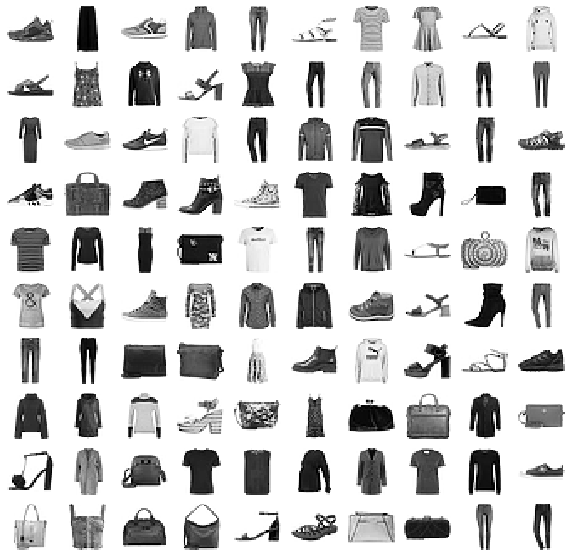

In [5]:
# tamaño del conjunto de instancias
m = y_train.shape[0]

# indices de una permutación aleatoria de instancias 
# para visualizarlas
indices = np.random.permutation(m)

# Elegimos 100 puntos al azar para desplegar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_train[rand_indices, :].reshape((10,10,-1))

# visualización de los datos
fig, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(sel[i,j].reshape((28,28)), cmap='Greys')          
        axarr[i,j].axis('off')

Sandalia


(-0.5, 27.5, 27.5, -0.5)

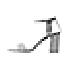

In [6]:
item=1692
print(prendas[np.argmax(y_train[item])])
fig,ax=plt.subplots(figsize=(1,1))
ax.imshow(X_train[item].reshape((28,28)), cmap='Greys')
ax.axis('off')

In [7]:
X_train = X_train[:100]
y_train = y_train[:100]
X_val = X_val[:20]
y_val = y_val[:20]

X_test = X_test[:20]
y_test = y_test[:20]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 100
Validation size: 20
Test size: 20


# 2. Arquitectura del Modelo

## Librerías para diseño de modelos secuenciales

In [8]:
# Librerías para el diseño de modelos secuenciales
from keras.models import Sequential
from keras.layers import InputLayer,Dense

#librerías de visualización de grafos de cómputo
import pydotplus
import pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

# para evitar warnings...      
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

from numpy.random import seed
seed(1)

## Definición del modelo
* La capa de entrada es de dimensión (400,)
* Para comenzar definamos un modelo sencillo con una sola capa oculta
* Una capa de salida con 10 neuronas

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
Salida (Dense)               (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________
None


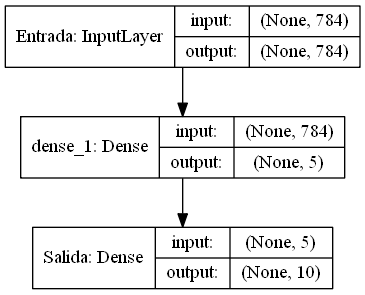

In [9]:
Otras capas que se pueden incluir:
model.add()

model1 = Sequential()
model1.add(InputLayer(input_shape=(X_train.shape[1],), name='Entrada'))
model1.add(Dense(5,activation='sigmoid'))
model1.add(Dense(10, activation='sigmoid',name='Salida'))
print(model1.summary())
keras.utils.plot_model(model1,show_shapes=True)

# 3. Configuración del aprendizaje

In [13]:
# Optimizadores: Ref. https://ruder.io/optimizing-gradient-descent/index.html#fn12
# - SGD: θ=θ−η⋅∇θJ(θ;x(i);y(i)).

# - adagrad: gt,i=∇θJ(θt,i). θt+1=θt−η/√G+ϵ⋅g. G∈Rd×d here is a diagonal matrix 
#   where each diagonal element i,i is the sum of the squares of the gradients 
#   w.r.t. θi up to time step t.

# - RMSprop: E[g^2](t)=0.9E[g^2](t−1)+0.1g^2 θt+1=θt−η√{E[g^2](t)+ϵ} g(t)
#   RMSprop divides the learning rate by an exponentially decaying average 
#   of squared gradients. Hinton suggests γ to be set to 0.9, while a good 
#   default value for the learning rate η is 0.001.

from keras.optimizers import SGD, RMSprop, adagrad
seed(1)
model1.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# 4. Entrenamiento (iteración)

## Entrenamiento

In [14]:
EPOCAS = 5
BATCH  = 16

history = model1.fit(X_train, y_train,
                    epochs=EPOCAS,
                    batch_size=BATCH,
                    validation_split=0.2, # alternativamente: validation_data=(X_val, y_val)
                    verbose=0)

print(model1.metrics_names)
score = model1.evaluate(X_test, y_test)

['loss', 'accuracy']
20/20 [==============================] - 0s 0us/step


## Verificación visual del aprendizaje

### Curvas de pérdida (costo)


Test loss: 0.709
Test accuracy: 41.0


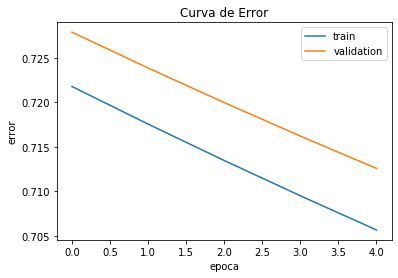

In [15]:
print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Error')
plt.ylabel('error')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='upper right')

### Curvas de exactitud

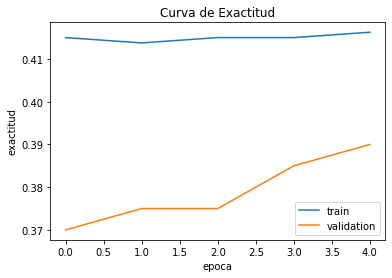

In [16]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Curva de Exactitud')
plt.ylabel('exactitud')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='lower right')

## &#9998; Ensaya distintas arquitecturas y configuraciones de entrenamiento

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

num_classes = 10
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Reserva 10,000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 50000
Validation size: 10000
Test size: 10000


In [18]:
from keras.layers import Dense,Activation,Dropout
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1,l1_l2,l2

from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from keras.optimizers import SGD, RMSprop, adagrad


model = Sequential()

# Ejemplos de cómo agregar capas:
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(200,activation='tanh',
#                 kernel_regularizer=l1_l2(l1=0.001,l2=0.0001),
#                 bias_regularizer=l2(1e-4)
#                 )
#                 )
# model.add(LeakyReLU(alpha=0.3))
# model.add(Activation('relu'))

""" TU CÓDIGO AQUÍ """
model.add(Dense(25,input_dim=X_train.shape[1]))
model.add(Dense(10, activation='sigmoid'))
"""------------------"""

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________
None


### Test

['loss', 'accuracy']
10000/10000 [==============================] - 0s 17us/step

Test loss: 0.113
Test accuracy: 95.74


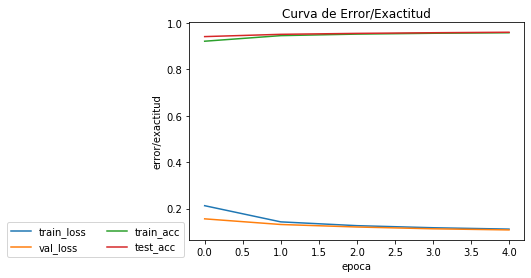

In [19]:
EPOCAS = 5
BATCH  = 10

history = model.fit(X_train, y_train,
                    epochs=EPOCAS,
                    batch_size=BATCH,
                    validation_split=0.2,
                    verbose=0)

print(model.metrics_names)
score = model.evaluate(X_test, y_test)
print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Curva de Error/Exactitud')
plt.ylabel('error/exactitud')
plt.xlabel('epoca')
# plt.legend(['train', 'validation'], loc='upper left')

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend(bbox_to_anchor=(0.0, 0.0), loc='right', ncol=2)